In [1]:
import pandas as pd
import numpy as np
import math

## 전처리

In [2]:
user_url_df = pd.read_csv('user_url_df', index_col=0)
review_df = pd.read_csv('raw_user_data ', index_col=0)

In [3]:
cate = review_df['cate_column'].unique()
cate

array(['카페', '한식', '양식', '아시아/퓨전 음식', '일식', '숙박', '여행/명소', '기타', '분식/치킨',
       '술집', '중식', '뷔페/레스토랑', '뷰티'], dtype=object)

In [4]:
#카테고리가 음식이 아닌 행 제거
new_df = review_df[~review_df['cate_column'].isin(['뷰티','숙박','여행/명소','기타'])]

In [5]:
new_df['userID'].value_counts()

희3974      618
토미n제리      532
초긍미래       228
달봉이애미      196
Nado79     167
정20        145
베리베리별99     81
쩡3511       22
토마토0000     21
mk542       18
Name: userID, dtype: int64

In [6]:
new_df[new_df['review_text'].isnull()]

,userID,restaur_names,review_text,cate_column
6,쩡3511,투썸플레이스 안산사동점,NaN,카페
75,정20,깐깐한족발 광주하남점,NaN,한식
78,정20,대박맛김치찜,NaN,한식
79,정20,증심사중앙식당,NaN,한식
80,정20,싸다아구찜,NaN,한식
...,...,...,...,...
3443,달봉이애미,정통손짜장,NaN,중식
3444,달봉이애미,이부자손짜장,NaN,중식
3445,달봉이애미,미각,NaN,중식
3446,달봉이애미,춤추는철가방,NaN,중식


In [7]:
#사용자별 리뷰텍스트 없는 행 개수 확인
new_df[new_df['review_text'].isnull()].userID.value_counts()

희3974      521
달봉이애미      156
정20         53
베리베리별99     30
초긍미래        22
토미n제리       10
쩡3511        1
토마토0000      1
Name: userID, dtype: int64

In [8]:
# 카테고리 빈도수 계산 위해 컬럼 생성
cate = new_df['cate_column'].unique()

for cate_name in cate:
    user_url_df[cate_name] = 0
user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,0,0,0,0,0,0,0,0,0
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,0,0,0,0,0,0,0,0,0
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,0,0,0,0,0,0,0,0,0
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,0,0,0,0,0,0,0,0,0
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,0,0,0,0,0,0,0,0,0
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,0,0,0,0,0,0,0,0,0
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,0,0,0,0,0,0,0,0,0
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,0,0,0,0,0,0,0,0,0
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,0,0,0,0,0,0,0,0,0
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,0,0,0,0,0,0,0,0,0


In [9]:
# 카테고리별 비율 저장
for user in list(new_df['userID'].unique()):
    for cate_name in cate:
        if cate_name in list(new_df[new_df['userID']==user].cate_column.unique()):
            user_url_df.loc[user_url_df['userID']==user,cate_name] = pd.DataFrame(new_df[new_df['userID']==user]['cate_column'].value_counts()).loc[cate_name,'cate_column']


user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,12,6,2,1,1,0,0,0,0
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,37,72,11,0,3,15,4,2,1
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,84,61,31,1,8,31,0,10,2
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,220,328,10,0,14,26,0,15,5
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,59,71,5,1,10,7,5,9,0
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,8,7,1,1,1,0,0,0,0
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,8,10,1,0,0,0,2,0,0
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,30,17,9,2,7,12,1,2,1
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,238,110,24,6,38,55,22,36,3
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,63,83,8,0,11,16,9,6,0


In [10]:
for i in range(len(user_url_df)):
    user_url_df.loc[i,'total'] = user_url_df.iloc[i,2:2+len(cate)].sum()
user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,total
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,12,6,2,1,1,0,0,0,0,22.0
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,37,72,11,0,3,15,4,2,1,145.0
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,84,61,31,1,8,31,0,10,2,228.0
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,220,328,10,0,14,26,0,15,5,618.0
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,59,71,5,1,10,7,5,9,0,167.0
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,8,7,1,1,1,0,0,0,0,18.0
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,8,10,1,0,0,0,2,0,0,21.0
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,30,17,9,2,7,12,1,2,1,81.0
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,238,110,24,6,38,55,22,36,3,532.0
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,63,83,8,0,11,16,9,6,0,196.0


In [11]:
for i in range(len(cate)):
    user_url_df.iloc[:,i+2] = user_url_df.iloc[:,i+2] / user_url_df['total']
user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,total
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,0.545455,0.272727,0.090909,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,22.0
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,0.255172,0.496552,0.075862,0.000000,0.020690,0.103448,0.027586,0.013793,0.006897,145.0
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,0.368421,0.267544,0.135965,0.004386,0.035088,0.135965,0.000000,0.043860,0.008772,228.0
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,0.355987,0.530744,0.016181,0.000000,0.022654,0.042071,0.000000,0.024272,0.008091,618.0
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,0.353293,0.425150,0.029940,0.005988,0.059880,0.041916,0.029940,0.053892,0.000000,167.0
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,0.444444,0.388889,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,18.0
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,0.380952,0.476190,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,21.0
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,0.370370,0.209877,0.111111,0.024691,0.086420,0.148148,0.012346,0.024691,0.012346,81.0
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,0.447368,0.206767,0.045113,0.011278,0.071429,0.103383,0.041353,0.067669,0.005639,532.0
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,0.321429,0.423469,0.040816,0.000000,0.056122,0.081633,0.045918,0.030612,0.000000,196.0


In [12]:
new_df

,userID,restaur_names,review_text,cate_column
0,쩡3511,달마이어,항상 배앓이를 해서 락토프리로 주문하는데요. 연유라떼 주문해서 차타고 집에 왔는데 ...,카페
1,쩡3511,큰숲빵집 부곡점,오늘도 소금빵 맛있었어요!!,카페
2,쩡3511,오투하우스카페,편안하게 가성비 있는 커피 마시기에 좋아요~~~,카페
3,쩡3511,별의감성,바스크치즈케이크가 정말 맛있는 곳이에요! 커피 머신을 바꿨다고 하시는데 크레마덕에 ...,카페
4,쩡3511,배스킨라빈스 안산부곡점,요즘 spc 불매로 잘 안먹었는데 아이들이 마땅히 먹을 아이스크림 가게가 없어서 주...,카페
...,...,...,...,...
3443,달봉이애미,정통손짜장,NaN,중식
3444,달봉이애미,이부자손짜장,NaN,중식
3445,달봉이애미,미각,NaN,중식
3446,달봉이애미,춤추는철가방,NaN,중식


In [13]:
# new_df['soup'] = new_df.copy()['restaur_names'] + " " + new_df.copy()['review_text']
# 위코드는 하나의 열에서 nan값이 있을 경우 nan로 나옴

new_df['soup'] = new_df['restaur_names'].str.cat(new_df['review_text'], sep=" ", na_rep=" ")

new_df = new_df[['userID', 'soup','cate_column']]

C:\Users\piai\AppData\Local\Temp\ipykernel_72512\1725980643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['soup'] = new_df['restaur_names'].str.cat(new_df['review_text'], sep=" ", na_rep=" ")


In [14]:
#nan값 있어도 잘 더해져서 음식점명이 들어있는지 확인용
new_df.head(50)

,userID,soup,cate_column
0,쩡3511,달마이어 항상 배앓이를 해서 락토프리로 주문하는데요. 연유라떼 주문해서 차타고 집에...,카페
1,쩡3511,큰숲빵집 부곡점 오늘도 소금빵 맛있었어요!!,카페
2,쩡3511,오투하우스카페 편안하게 가성비 있는 커피 마시기에 좋아요~~~,카페
3,쩡3511,별의감성 바스크치즈케이크가 정말 맛있는 곳이에요! 커피 머신을 바꿨다고 하시는데 크...,카페
4,쩡3511,배스킨라빈스 안산부곡점 요즘 spc 불매로 잘 안먹었는데 아이들이 마땅히 먹을 아이...,카페
5,쩡3511,큰숲빵집 부곡점 처음에 생겼을때 지인분이 가져다 주셔서 먹었을 때에는 빵 맛이 별로...,카페
6,쩡3511,투썸플레이스 안산사동점,카페
7,쩡3511,"오늘도, 카페일리터 부곡점 커피가 괜찮아요. 아직 두번밖에 안갔지만.. 이왕 쿠폰 ...",카페
8,쩡3511,몽그리즈치즈카페 원주에 있는 한옥카페라고 해서 가족들과 함께 방문했어요.,카페
9,쩡3511,이디야커피 안산부곡동점 가장 대중적인 커피맛일듯 싶어요. 누구나 좋아할 맛입니다. ...,카페


In [15]:
#정제한 메뉴데이터셋 가져오기
#메뉴명을 식당이름과 리뷰테스트에서 조회할 예정
menu_data = pd.read_csv('new_df.csv')
menu_data

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
0,10000.0,Y,"야채,미꾸라지",한식,추어탕
1,15000.0,N,밀가루,한식,닭강정
2,5500.0,N,"야채,쌀",한식,비빔밥
3,10000.0,Y,"야채,도토리",한식,도토리묵무침
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비
...,...,...,...,...,...
258,10000.0,N,"새우,오징어,쌀,계란,꽈리고추,가지,단호박,밀가루,김,팽이버섯",일식,텐동
259,4900.0,N,"야채,닭가슴살,빵,방울토마토",일식,데리야키
260,4500.0,N,"밀가루,닭껍질",한식,닭껍질튀김
261,3800.0,N,"버터,계란,밀가루,설탕",양식,크로플


In [16]:
new_df

,userID,soup,cate_column
0,쩡3511,달마이어 항상 배앓이를 해서 락토프리로 주문하는데요. 연유라떼 주문해서 차타고 집에...,카페
1,쩡3511,큰숲빵집 부곡점 오늘도 소금빵 맛있었어요!!,카페
2,쩡3511,오투하우스카페 편안하게 가성비 있는 커피 마시기에 좋아요~~~,카페
3,쩡3511,별의감성 바스크치즈케이크가 정말 맛있는 곳이에요! 커피 머신을 바꿨다고 하시는데 크...,카페
4,쩡3511,배스킨라빈스 안산부곡점 요즘 spc 불매로 잘 안먹었는데 아이들이 마땅히 먹을 아이...,카페
...,...,...,...
3443,달봉이애미,정통손짜장,중식
3444,달봉이애미,이부자손짜장,중식
3445,달봉이애미,미각,중식
3446,달봉이애미,춤추는철가방,중식


In [17]:
# 빈 메뉴명 열 생성
new_df["메뉴명"] = np.nan
new_df

C:\Users\piai\AppData\Local\Temp\ipykernel_72512\185460220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["메뉴명"] = np.nan


,userID,soup,cate_column,메뉴명
0,쩡3511,달마이어 항상 배앓이를 해서 락토프리로 주문하는데요. 연유라떼 주문해서 차타고 집에...,카페,NaN
1,쩡3511,큰숲빵집 부곡점 오늘도 소금빵 맛있었어요!!,카페,NaN
2,쩡3511,오투하우스카페 편안하게 가성비 있는 커피 마시기에 좋아요~~~,카페,NaN
3,쩡3511,별의감성 바스크치즈케이크가 정말 맛있는 곳이에요! 커피 머신을 바꿨다고 하시는데 크...,카페,NaN
4,쩡3511,배스킨라빈스 안산부곡점 요즘 spc 불매로 잘 안먹었는데 아이들이 마땅히 먹을 아이...,카페,NaN
...,...,...,...,...
3443,달봉이애미,정통손짜장,중식,NaN
3444,달봉이애미,이부자손짜장,중식,NaN
3445,달봉이애미,미각,중식,NaN
3446,달봉이애미,춤추는철가방,중식,NaN


In [18]:
# 메뉴명 채우기
# 합친 텍스트열에서 메뉴명이 있으면 메뉴명 열에 추가
for i in range(0, len(new_df['soup'])):
    soup = new_df['soup'].iloc[i]
    candidate = []
    for menu in menu_data['메뉴카테고리소분류명']:
        if (pd.isna(new_df['메뉴명'].iloc[i])) & (menu in soup):
            candidate.append(menu)
            new_df['메뉴명'].iloc[i] = max(candidate)

C:\Users\piai\AppData\Local\Temp\ipykernel_72512\1726994556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['메뉴명'].iloc[i] = max(candidate)


In [19]:
new_df[new_df['메뉴명'].isnull()].soup.head(50)

0     달마이어 항상 배앓이를 해서 락토프리로 주문하는데요. 연유라떼 주문해서 차타고 집에...
1                              큰숲빵집 부곡점 오늘도 소금빵 맛있었어요!!
2                    오투하우스카페 편안하게 가성비 있는 커피 마시기에 좋아요~~~
5     큰숲빵집 부곡점 처음에 생겼을때 지인분이 가져다 주셔서 먹었을 때에는 빵 맛이 별로...
6                                        투썸플레이스 안산사동점  
7     오늘도, 카페일리터 부곡점 커피가 괜찮아요. 아직 두번밖에 안갔지만.. 이왕 쿠폰 ...
8              몽그리즈치즈카페 원주에 있는 한옥카페라고 해서 가족들과 함께 방문했어요.
9     이디야커피 안산부곡동점 가장 대중적인 커피맛일듯 싶어요. 누구나 좋아할 맛입니다. ...
10    오가다 제주공항점 바쁜시간엔 키오스크로 주문하도록 하네요. 커피맛이 진해서 중간에 ...
11    오투하우스카페 커피가 맛있어요. 편하게 대화할수 있고 2층에 좌석이 마련되 있어서 ...
15    고기싸롱 안산상록수점 사진을 못찍어서 너무 아쉽네요. 직원이나 사장님 모두 친절하시...
16              춘심이네 본점 생선을 좋아하는 사람이라면 한번쯤 도장깨기가 필요한곳!!
17    청담생고기 광교점 허겁지겁 먹느라 사진을 하나도 못 찍었네요 ㅎㅎ^^;; 어머니 모...
19       버거킹 안산중앙역점 이게ㅡ내가 먹던 와퍼가 맞는건가요.. 양상추 한장 실화입니까..
35    CJ프레시웨이 병원에서 한끼떼우는일도 쉽지않은일인데, 적절한 시간에 다른큰병원들보다...
37            하루 번잡스럽긴 해도 북적북적 간만에 시장통같고 좋았어요 음식은 맛별루네요
39    양촌리 화로구이 도곡점 꽃등심이랑 토시살 4인이 부드럽게 잘먹고 왔습니다, 야채도 ...
40    람바다 회무침이 맛나던데요?? 깻잎이랑 김이랑 싸먹으니까 더욱 고소하고 향이

In [20]:
menu_data['메뉴카테고리대분류명'].unique()

array(['한식', '제과류', '패스트푸드', '중식', '일식', '양식', '기타'], dtype=object)

In [21]:
new_df['cate_column'].unique()

array(['카페', '한식', '양식', '아시아/퓨전 음식', '일식', '분식/치킨', '술집', '중식',
       '뷔페/레스토랑'], dtype=object)

In [22]:
# 사용자별로 가장 많이 먹은 음식 조회
for user in list(new_df['userID'].unique()):
    print(user+'님의 많이 먹은 메뉴 TOP3')
    display(pd.DataFrame(new_df[new_df['userID']==user].메뉴명.value_counts()).iloc[:3])
    print("\n")

쩡3511님의 많이 먹은 메뉴 TOP3


,메뉴명
케이크,1
아이스크림,1
된장찌개,1




정20님의 많이 먹은 메뉴 TOP3


,메뉴명
갈비,7
치킨,4
국밥,4




초긍미래님의 많이 먹은 메뉴 TOP3


,메뉴명
치킨,11
육개장,5
떡볶이,5




희3974님의 많이 먹은 메뉴 TOP3


,메뉴명
한우,36
칼국수,35
낙지볶음,11




Nado79님의 많이 먹은 메뉴 TOP3


,메뉴명
추어탕,5
국수,5
해장국,5




mk542님의 많이 먹은 메뉴 TOP3


,메뉴명
비빔밥,2
와플,1
샌드위치,1




토마토0000님의 많이 먹은 메뉴 TOP3


,메뉴명
국밥,1
갈치조림,1
칼국수,1




베리베리별99님의 많이 먹은 메뉴 TOP3


,메뉴명
국수,4
갈비,3
초밥,3




토미n제리님의 많이 먹은 메뉴 TOP3


,메뉴명
케이크,22
샐러드,13
칼국수,12




달봉이애미님의 많이 먹은 메뉴 TOP3


,메뉴명
국밥,8
치킨,7
냉면,6


In [23]:
user_url_df['1위 메뉴'] = np.nan
user_url_df['2위 메뉴'] = np.nan
user_url_df['3위 메뉴'] = np.nan
user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,total,1위 메뉴,2위 메뉴,3위 메뉴
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,0.545455,0.272727,0.090909,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,22.0,NaN,NaN,NaN
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,0.255172,0.496552,0.075862,0.000000,0.020690,0.103448,0.027586,0.013793,0.006897,145.0,NaN,NaN,NaN
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,0.368421,0.267544,0.135965,0.004386,0.035088,0.135965,0.000000,0.043860,0.008772,228.0,NaN,NaN,NaN
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,0.355987,0.530744,0.016181,0.000000,0.022654,0.042071,0.000000,0.024272,0.008091,618.0,NaN,NaN,NaN
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,0.353293,0.425150,0.029940,0.005988,0.059880,0.041916,0.029940,0.053892,0.000000,167.0,NaN,NaN,NaN
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,0.444444,0.388889,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,18.0,NaN,NaN,NaN
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,0.380952,0.476190,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,21.0,NaN,NaN,NaN
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,0.370370,0.209877,0.111111,0.024691,0.086420,0.148148,0.012346,0.024691,0.012346,81.0,NaN,NaN,NaN
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,0.447368,0.206767,0.045113,0.011278,0.071429,0.103383,0.041353,0.067669,0.005639,532.0,NaN,NaN,NaN
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,0.321429,0.423469,0.040816,0.000000,0.056122,0.081633,0.045918,0.030612,0.000000,196.0,NaN,NaN,NaN


## 추천함수 1
가장 많이 먹은 메뉴(1,2,3위)와 유사도가 높은 메뉴 각각 두 개씩 꺼내어 총 여섯가지 추천

In [24]:
# 사용자가 가장 많이 먹은 메뉴 저장
user_list = list(user_url_df['userID'].unique())

for i in range(0, len(user_list)):
    a = pd.DataFrame(new_df[new_df['userID']==user_list[i]].메뉴명.value_counts().iloc[:3]).reset_index()
    a.columns = ['메뉴명', '횟수']
    lst = list(a['메뉴명'])
    if len(lst)==0:
        continue
    if len(lst)>=1:
        user_url_df.loc[i,'1위 메뉴'] = lst[0]
    if len(lst)>=2:
        user_url_df.loc[i,'2위 메뉴'] = lst[1]
    if len(lst)>=3:
        user_url_df.loc[i,'3위 메뉴'] = lst[2]
user_url_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,total,1위 메뉴,2위 메뉴,3위 메뉴
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,0.545455,0.272727,0.090909,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,22.0,케이크,아이스크림,된장찌개
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,0.255172,0.496552,0.075862,0.000000,0.020690,0.103448,0.027586,0.013793,0.006897,145.0,갈비,치킨,국밥
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,0.368421,0.267544,0.135965,0.004386,0.035088,0.135965,0.000000,0.043860,0.008772,228.0,치킨,육개장,떡볶이
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,0.355987,0.530744,0.016181,0.000000,0.022654,0.042071,0.000000,0.024272,0.008091,618.0,한우,칼국수,낙지볶음
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,0.353293,0.425150,0.029940,0.005988,0.059880,0.041916,0.029940,0.053892,0.000000,167.0,추어탕,국수,해장국
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,0.444444,0.388889,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,18.0,비빔밥,와플,샌드위치
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,0.380952,0.476190,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,21.0,국밥,갈치조림,칼국수
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,0.370370,0.209877,0.111111,0.024691,0.086420,0.148148,0.012346,0.024691,0.012346,81.0,국수,갈비,초밥
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,0.447368,0.206767,0.045113,0.011278,0.071429,0.103383,0.041353,0.067669,0.005639,532.0,케이크,샐러드,칼국수
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,0.321429,0.423469,0.040816,0.000000,0.056122,0.081633,0.045918,0.030612,0.000000,196.0,국밥,치킨,냉면


  (0, 107)	0.5396425385947002
  (0, 243)	0.5024483200691738
  (0, 86)	0.4247237979210298
  (0, 106)	0.5024483200691738
  (0, 224)	0.15325468129206993
0       추어탕
1       닭강정
2       비빔밥
3    도토리묵무침
4       닭갈비
Name: 메뉴카테고리소분류명, dtype: object 메뉴카테고리소분류명
추어탕       0
닭강정       1
비빔밥       2
도토리묵무침    3
닭갈비       4
dtype: int64


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
0,10000.0,Y,"야채,미꾸라지",한식,추어탕


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
185,35000.0,N,"야채,고추,돼지고기",중식,라조육


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
30,15000.0,N,갈비,한식,갈비,갈비 한식 갈비


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
24,30000.0,N,"야채,소갈비",한식,갈비찜,"야채,소갈비 한식 갈비찜"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
149,17900.0,N,"소갈비,마늘,흑마늘",양식,스테이크,"소갈비,마늘,흑마늘 양식 스테이크"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비,"야채,고추,닭고기,양배추 한식 닭갈비"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
18,35000.0,N,"야채,닭고기,감자",한식,닭볶음탕,"야채,닭고기,감자 한식 닭볶음탕"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기,"야채,고추,닭고기,전분 중식 깐풍기"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
103,6000.0,N,"야채,고추,고기",한식,주물럭,"야채,고추,고기 한식 주물럭"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
154,7000.0,N,"밀가루,설탕,코코아파우더,마스카포네치즈",양식,티라미수,"밀가루,설탕,코코아파우더,마스카포네치즈 양식 티라미수"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
261,3800.0,N,"버터,계란,밀가루,설탕",양식,크로플,"버터,계란,밀가루,설탕 양식 크로플"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
175,2000.0,N,"버터,계란,밀가루,설탕",한식,츄러스,"버터,계란,밀가루,설탕 한식 츄러스"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
156,3500.0,N,"버터,바나나,계란,밀가루,설탕,누텔라",제과류,와플,"버터,바나나,계란,밀가루,설탕,누텔라 제과류 와플"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
116,5000.0,N,계란,한식,계란탕,계란 한식 계란탕


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
150,3000.0,N,계란,한식,계란찜,계란 한식 계란찜


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
91,6000.0,N,"야채,쌀,계란",한식,오므라이스,"야채,쌀,계란 한식 오므라이스"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
116,5000.0,N,계란,한식,계란탕,계란 한식 계란탕


[0.16665278 0.2499875  0.09165153 0.16665278 0.19998667 0.13331889
 0.13331889 0.2499875  0.099985   0.13331889 0.11665194 0.11665194
 0.74999583 0.2499875  0.16665278 0.03331722 0.21665361 0.83333056
 0.58332639 1.         0.099985   0.49999167 0.13331889 0.08331806
 0.49999167 0.07498458 0.26665444 0.28332139 0.22498708 0.14998583
 0.2499875  0.099985   0.099985   0.21665361 0.23332056 0.2499875
 0.099985   0.11665194 0.2499875  0.03331722 0.06665111 0.41665694
 0.16665278 0.08331806 0.33332222 0.099985   0.16665278 0.21665361
 0.19998667 0.099985   0.10831847 0.03331722 0.08331806 0.13331889
 0.06665111 0.04998417 0.04998417 0.04998417 0.06665111 0.05831764
 0.28332139 0.11665194 0.16665278 0.26665444 0.08331806 0.14998583
 0.23332056 0.41665694 0.11665194 0.08331806 0.41665694 0.13331889
 0.16665278 0.56665944 0.5499925  0.099985   0.099985   0.06665111
 0.06665111 0.11665194 0.11665194 0.13331889 0.23332056 0.41665694
 0.41665694 0.58332639 0.49999167 0.2499875  0.11665194 0.09998

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비,"야채,고추,닭고기,양배추 한식 닭갈비"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기,"야채,고추,닭고기,전분 중식 깐풍기"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
103,6000.0,N,"야채,고추,고기",한식,주물럭,"야채,고추,고기 한식 주물럭"


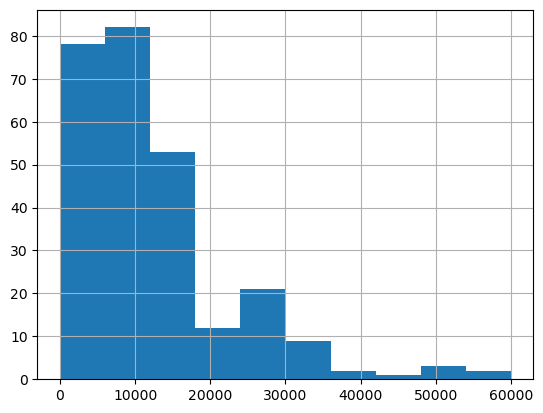

In [25]:
# 음식 유사도 계산 함수 불러오기
from menu_recipe_similarity import get_recommendations

# 유저가 많이 먹은 음식 top3 저장해서 유사도 계산 함수에 넣기
def user_recommendations(user):
    first = user_url_df[user_url_df['userID']==user]['1위 메뉴'].iloc[0]
    second = user_url_df[user_url_df['userID']==user]['2위 메뉴'].iloc[0]
    third = user_url_df[user_url_df['userID']==user]['3위 메뉴'].iloc[0]
    
    recommen = list(get_recommendations(first).head(2))+list(get_recommendations(second).head(2))+list(get_recommendations(third).head(2))
    
    return recommen

In [26]:
user_url_df[user_url_df['userID']=='초긍미래'][['1위 메뉴','2위 메뉴','3위 메뉴']]

,1위 메뉴,2위 메뉴,3위 메뉴
2,치킨,육개장,떡볶이


In [27]:
# 유저가 많이 먹었던 음식 세 가지에서 유사한 음식 각각 두 개씩 출력
user_recommendations('초긍미래')

['가라아게', '파닭', '동태전골', '닭개장', '라볶이', '국물떡볶이']

In [28]:
list(new_df[(new_df['userID']=='초긍미래')&(new_df['메뉴명'].notnull())].메뉴명.unique())

['베이글',
 '핫도그',
 '아이스크림',
 '와플',
 '빙수',
 '파이',
 '닭발',
 '갈비',
 '설렁탕',
 '물회',
 '황태',
 '육개장',
 '칼국수',
 '냉면',
 '보쌈',
 '해장국',
 '곰탕',
 '감자탕',
 '닭갈비',
 '김치찌개',
 '국수',
 '쌈밥',
 '보리밥',
 '치킨',
 '떡볶이',
 '간장치킨',
 '통닭',
 '김밥',
 '토스트',
 '햄버거',
 '감자튀김',
 '칠리',
 '짜장면',
 '수육',
 '유린기',
 '짜장',
 '짬뽕',
 '우동',
 '텐동',
 '물냉면',
 '스테이크']

In [29]:
user_recommendations('베리베리별99')

['볶음면', '비빔밥', '김치전골', '볶음면', '왕새우튀김', '새우볶음밥']

## 추천함수 2 - 전체 유저의 순위 반영하여 데이터가 적은 사용자 보완

In [30]:
new_df['메뉴명'].value_counts()

칼국수      59
한우       39
김밥       38
갈비       34
치킨       29
         ..
닭껍질튀김     1
쉐이크       1
티라미수      1
바베큐       1
사시미       1
Name: 메뉴명, Length: 106, dtype: int64

In [31]:
popular_rank = pd.DataFrame(new_df['메뉴명'].value_counts())
popular_rank = list(popular_rank.index)
popular_rank

['칼국수',
 '한우',
 '김밥',
 '갈비',
 '치킨',
 '국밥',
 '케이크',
 '해장국',
 '국수',
 '샐러드',
 '짬뽕',
 '우동',
 '떡볶이',
 '냉면',
 '통닭',
 '삼계탕',
 '낙지볶음',
 '추어탕',
 '닭갈비',
 '비빔밥',
 '매운탕',
 '덮밥',
 '파스타',
 '아이스크림',
 '짜장',
 '수육',
 '파이',
 '김치찌개',
 '짜장면',
 '초밥',
 '육개장',
 '와플',
 '샌드위치',
 '꼬치',
 '닭발',
 '빙수',
 '베이글',
 '핫도그',
 '보쌈',
 '물회',
 '설렁탕',
 '감자탕',
 '토스트',
 '된장찌개',
 '곰탕',
 '족발',
 '쌈밥',
 '부대찌개',
 '보리밥',
 '대구탕',
 '라멘',
 '갈치조림',
 '양념치킨',
 '계란찜',
 '크로플',
 '치즈스틱',
 '육회',
 '빈대떡',
 '청국장',
 '닭강정',
 '알탕',
 '송어회',
 '전복죽',
 '삼합',
 '갈비찜',
 '미역국',
 '물냉면',
 '황태',
 '스테이크',
 '간장치킨',
 '햄버거',
 '감자튀김',
 '김치만두',
 '오리탕',
 '백반',
 '잡채밥',
 '카레',
 '순대국',
 '두부찌개',
 '고등어구이',
 '와사비',
 '샤브샤브',
 '알밥',
 '안심',
 '곤드레밥',
 '해물찜',
 '소바',
 '꿔바로우',
 '돼지껍데기',
 '김치찜',
 '텐동',
 '고기만두',
 '동태탕',
 '해물탕',
 '막국수',
 '잔치국수',
 '잡채',
 '유린기',
 '비빔냉면',
 '칠리',
 '떡만두국',
 '닭껍질튀김',
 '쉐이크',
 '티라미수',
 '바베큐',
 '사시미']

In [32]:
menu_data

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
0,10000.0,Y,"야채,미꾸라지",한식,추어탕
1,15000.0,N,밀가루,한식,닭강정
2,5500.0,N,"야채,쌀",한식,비빔밥
3,10000.0,Y,"야채,도토리",한식,도토리묵무침
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비
...,...,...,...,...,...
258,10000.0,N,"새우,오징어,쌀,계란,꽈리고추,가지,단호박,밀가루,김,팽이버섯",일식,텐동
259,4900.0,N,"야채,닭가슴살,빵,방울토마토",일식,데리야키
260,4500.0,N,"밀가루,닭껍질",한식,닭껍질튀김
261,3800.0,N,"버터,계란,밀가루,설탕",양식,크로플


In [33]:
menu_data['메뉴카테고리대분류명']

0      한식
1      한식
2      한식
3      한식
4      한식
       ..
258    일식
259    일식
260    한식
261    양식
262    한식
Name: 메뉴카테고리대분류명, Length: 263, dtype: object

In [34]:
user_url_df[user_url_df['userID']=='쩡3511'].loc[:,'카페']

0    0.545455
Name: 카페, dtype: float64

In [35]:
user_url_df[user_url_df['userID']=='쩡3511'].index[0]

0

In [36]:
idx = user_url_df[user_url_df['userID']==user].index[0]
user_url_df.drop(['userID','naver_map_url','1위 메뉴','2위 메뉴','3위 메뉴', 'total'], axis=1).loc[idx]

카페           0.321429
한식           0.423469
양식           0.040816
아시아/퓨전 음식    0.000000
일식           0.056122
분식/치킨        0.081633
술집           0.045918
중식           0.030612
뷔페/레스토랑      0.000000
Name: 9, dtype: float64

In [37]:
idx = user_url_df[user_url_df['userID']=='쩡3511'].index[0]
menu_ratio = pd.DataFrame(user_url_df.drop(['userID','naver_map_url','1위 메뉴','2위 메뉴','3위 메뉴', 'total'], axis=1).loc[idx])
menu_ratio.to_csv('menu_ratio')

In [38]:
# 먹은 음식이 3개 미만인 신규유저를 고려하여 추천 함수 수정
# 가격 고려 함수로 변경
from menu_recipe_similarity import find_simi_menu

def user_recommendations(user):
    
    popular_rank = list(pd.DataFrame(new_df['메뉴명'].value_counts()).index)
     
    first = user_url_df[user_url_df['userID']==user]['1위 메뉴'].iloc[0]
    second = user_url_df[user_url_df['userID']==user]['2위 메뉴'].iloc[0]
    third = user_url_df[user_url_df['userID']==user]['3위 메뉴'].iloc[0]
    
    #가중치 파일 저장
    idx = user_url_df[user_url_df['userID']==user].index[0]
    menu_ratio = pd.DataFrame(user_url_df.drop(['userID','naver_map_url','1위 메뉴','2위 메뉴','3위 메뉴', 'total'], axis=1).loc[idx])
    menu_ratio.to_csv('menu_ratio')
    
    if pd.isna(first): # 첫번째가 결측치 -> 전부 결측치
        recommen = popular_rank[0:6]
    elif pd.isna(second):
        recommen = list(find_simi_menu(first).head(2))+popular_rank[0:4]
    elif pd.isna(third):
        recommen = list(find_simi_menu(first).head(2))+list(find_simi_menu(second).head(2))+popular_rank[0:2]
    else:
        recommen = list(find_simi_menu(first).head(2))+list(find_simi_menu(second).head(2))+list(find_simi_menu(third).head(2))

    return recommen

In [39]:
user_recommendations('달봉이애미')

['순대국', '김말이', '가라아게', '파닭', '물냉면', '비빔냉면']

In [40]:
pd.read_csv('menu_ratio')

,Unnamed: 0,9
0,카페,0.321429
1,한식,0.423469
2,양식,0.040816
3,아시아/퓨전 음식,0.000000
4,일식,0.056122
5,분식/치킨,0.081633
6,술집,0.045918
7,중식,0.030612
8,뷔페/레스토랑,0.000000


### @랜덤 적용 (아직 고려중)

In [41]:
import random
menu = list(menu_data['메뉴카테고리소분류명'])
random_menu = random.choice(menu)
print(random_menu)

양갈비


## 사용자 유형 분류

In [42]:
user_type = pd.read_csv('user_type.csv', index_col=0)
user_type

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경제성추구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
로컬푸드지향,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
식생활모험가,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
안전성중시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
simi_menu = pd.read_csv('simi_menu', index_col=0)
simi_menu

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
0,1.000000,0.016243,0.029386,0.020836,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
1,0.013791,1.000000,0.019307,0.013791,0.011075,0.010859,0.014108,0.012216,0.019309,0.020072,...,0.005789,0.012210,0.007442,0.019165,0.016644,0.027319,0.005790,0.055324,0.037136,0.150954
2,0.028660,0.021013,1.000000,0.028660,0.021725,0.022556,0.030056,0.023357,0.185907,0.020922,...,0.022149,0.023345,0.006532,0.182965,0.016806,0.007521,0.019280,0.018604,0.008999,0.013946
3,0.020836,0.016243,0.029386,1.000000,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
4,0.016289,0.013861,0.022780,0.016289,1.000000,0.012838,0.016661,0.083491,0.022782,0.013623,...,0.013825,0.013430,0.007607,0.021645,0.011863,0.007934,0.012362,0.012017,0.007926,0.047627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.003322,0.024901,0.003320,0.003322,0.002659,0.003321,0.003321,0.001663,0.003320,0.006620,...,0.028271,0.035188,0.007276,0.001496,0.006623,1.000000,0.024068,0.019964,0.035476,0.017102
259,0.010511,0.004126,0.015926,0.010511,0.007915,0.009089,0.011399,0.007728,0.015762,0.006438,...,0.049819,0.007724,0.006433,0.012622,0.005778,0.024859,1.000000,0.007460,0.009098,0.000980
260,0.009989,0.053680,0.015183,0.009989,0.007503,0.008686,0.010865,0.007270,0.015018,0.015951,...,0.007526,0.007266,0.006367,0.011878,0.012990,0.020693,0.007395,1.000000,0.029092,0.038942
261,0.002292,0.033754,0.003785,0.002292,0.001628,0.002956,0.002956,0.000632,0.003619,0.006256,...,0.007575,0.000632,0.033021,0.000465,0.005596,0.034488,0.007279,0.027374,1.000000,0.023643


In [44]:
user_like = new_df[['userID','메뉴명']].groupby(['userID']).value_counts().unstack()
user_like

메뉴명,간장치킨,갈비,갈비찜,갈치조림,감자탕,감자튀김,계란찜,고기만두,고등어구이,곤드레밥,...,티라미수,파스타,파이,한우,핫도그,해물찜,해물탕,해장국,햄버거,황태
userID,,,,,,,,,,,,,,,,,,,,,
Nado79,NaN,5.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,NaN,1.0,5.0,NaN,1.0
mk542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
달봉이애미,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,NaN
베리베리별99,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
정20,NaN,7.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN
쩡3511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
초긍미래,2.0,5.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,4.0,NaN,NaN,2.0,2.0,1.0
토마토0000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
토미n제리,NaN,8.0,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,...,1.0,3.0,1.0,1.0,NaN,NaN,NaN,7.0,NaN,NaN


In [45]:
user_type_matrix = pd.concat([user_type,user_like])
user_type_matrix

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
경제성추구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
로컬푸드지향,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
식생활모험가,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
안전성중시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nado79,5.0,NaN,2.0,NaN,2.0,1.0,5.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
mk542,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
달봉이애미,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0
베리베리별99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
정20,NaN,NaN,1.0,NaN,NaN,NaN,3.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [46]:
user_type_matrix = user_type_matrix.fillna(0)
user_type_matrix

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경제성추구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
로컬푸드지향,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
식생활모험가,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
안전성중시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nado79,5.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
mk542,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
달봉이애미,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
베리베리별99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
정20,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


0인 데이터가 많아 사용자유형데이터를 이용하여 사용자의 다른 메뉴 선호도를 예측하는 방식을 사용해야 할 듯함

### KNN 결측치 계산

In [47]:
user_type = user_type.fillna(0)
user_type

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경제성추구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
로컬푸드지향,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
식생활모험가,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
안전성중시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
simi_menu

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
0,1.000000,0.016243,0.029386,0.020836,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
1,0.013791,1.000000,0.019307,0.013791,0.011075,0.010859,0.014108,0.012216,0.019309,0.020072,...,0.005789,0.012210,0.007442,0.019165,0.016644,0.027319,0.005790,0.055324,0.037136,0.150954
2,0.028660,0.021013,1.000000,0.028660,0.021725,0.022556,0.030056,0.023357,0.185907,0.020922,...,0.022149,0.023345,0.006532,0.182965,0.016806,0.007521,0.019280,0.018604,0.008999,0.013946
3,0.020836,0.016243,0.029386,1.000000,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
4,0.016289,0.013861,0.022780,0.016289,1.000000,0.012838,0.016661,0.083491,0.022782,0.013623,...,0.013825,0.013430,0.007607,0.021645,0.011863,0.007934,0.012362,0.012017,0.007926,0.047627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.003322,0.024901,0.003320,0.003322,0.002659,0.003321,0.003321,0.001663,0.003320,0.006620,...,0.028271,0.035188,0.007276,0.001496,0.006623,1.000000,0.024068,0.019964,0.035476,0.017102
259,0.010511,0.004126,0.015926,0.010511,0.007915,0.009089,0.011399,0.007728,0.015762,0.006438,...,0.049819,0.007724,0.006433,0.012622,0.005778,0.024859,1.000000,0.007460,0.009098,0.000980
260,0.009989,0.053680,0.015183,0.009989,0.007503,0.008686,0.010865,0.007270,0.015018,0.015951,...,0.007526,0.007266,0.006367,0.011878,0.012990,0.020693,0.007395,1.000000,0.029092,0.038942
261,0.002292,0.033754,0.003785,0.002292,0.001628,0.002956,0.002956,0.000632,0.003619,0.006256,...,0.007575,0.000632,0.033021,0.000465,0.005596,0.034488,0.007279,0.027374,1.000000,0.023643


In [49]:
#사용자유형1의 데이터
user_type.loc['건강식단추구'].values

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 29.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0., 28.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0., 18.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [50]:
#음식 0번과 다른 음식 간의 유사도
simi_menu.iloc[0].values

array([1.        , 0.01624267, 0.02938584, 0.02083622, 0.01596182,
       0.0162915 , 0.02132653, 0.01673081, 0.02938828, 0.01627792,
       0.01819752, 0.01410943, 0.00893576, 0.01202053, 0.0082646 ,
       0.00825369, 0.00939404, 0.0069885 , 0.01669613, 0.01927862,
       0.0215306 , 0.00694078, 0.01700638, 0.01300998, 0.01937455,
       0.00825709, 0.00628733, 0.01817851, 0.00711167, 0.01670847,
       0.01348422, 0.02288086, 0.02288086, 0.01454483, 0.01098967,
       0.01987761, 0.02938828, 0.02082585, 0.00661715, 0.00825369,
       0.00825641, 0.01899633, 0.01469384, 0.01787009, 0.01396612,
       0.01851724, 0.01546539, 0.01381529, 0.01615208, 0.01713004,
       0.01906826, 0.01683156, 0.01763382, 0.01759049, 0.00825641,
       0.02209175, 0.02081202, 0.02187603, 0.02202373, 0.0220219 ,
       0.01299076, 0.02216259, 0.01703383, 0.02125052, 0.01712719,
       0.01817636, 0.01333605, 0.01230112, 0.0082605 , 0.02081893,
       0.01170291, 0.0121567 , 0.0082646 , 0.01723449, 0.01240

In [51]:
def fillNA_KNN(df):
    for user in list(user_type.index): #사용자 유형마다
        for i in list(user_type.columns): #컬럼(음식)마다
            if user_type.loc[user, i]==0: #결측치이면 채워넣을건데
                # SUM OF (각 음식별 유사도*점수 )
                productsum = sum([x*y for x,y in zip(user_type.loc[user].values, simi_menu.iloc[list(user_type.columns).index(i)].values)])
                sumofsim = sum(simi_menu.iloc[list(user_type.columns).index(i)])-1 #대상음식과 나머지음식들과의 전체 유사도 합
                print(sumofsim)
                user_type.loc[user, i] = productsum/sumofsim
        
    return df

In [52]:
fillNA_KNN(user_type)

3.8374726744472243
5.772911414481527
6.205501613353917
3.8374726744472243
4.721251508871641
3.9871829703372024
4.508996284142921
4.347498270057776
6.218521904898196
2.8998903238434837
3.9468701585302046
3.2591206072226253
1.871353036288454
3.475618454154401
3.5141254641712445
1.5086189601236386
3.0133985338166367
1.8196971353740268
4.029347063881203
2.4891291142485295
4.442890005997586
2.234402741965586
4.051835970439121
3.800861937099718
3.82530398268002
2.687521597620206
5.06936152062034
7.174775840640841
5.113906117614759
3.3529132483496307
2.8552799741761623
5.968106187638787
5.968106187638787
3.5394997842657094
5.32555024907098
4.398422891115528
6.2185219048981955
3.8238073741140512
4.015813785358232
3.0337588618929088
4.342935805956004
3.511972468044447
5.082119810015683
5.765258804045401
4.222239007147465
8.342946043378312
3.289518593394088
2.6272692426829463
3.635509623563328
5.314150883316589
5.3968774813354035
3.5881882323381067
6.139215030856988
1.8127658947651724
5.86307012

3.6884095754199864
4.583494826189963
2.222301908818736
4.923455908552072
3.8158853632283973
2.9328084698211985
2.583584362299179
3.3133922678865986
2.870539186461855
2.0617453078017425
3.48847913225202
3.714334333658325
2.689293713704411
2.957557941577042
3.6581910687872528
3.9092503188194545
3.613063316441032
2.9735276710559804
2.1276337894333275
4.470159112601708
2.5562542203777086
2.725600117705295
4.55147601709104
4.12808557152569
3.3431728590191385
3.5157164712301787
5.275116635368576
2.9478068478019734
2.505179523137676
2.700683424088633
4.0320457900819235
4.254891634262165
3.6723858834672516
4.464177890022958
2.992238535729652
3.6800260702871377
1.5596051462463087
2.37230487738071
2.558388171356596
3.707140243970416
4.361991318797203
2.0462955618426153
6.129738453140519
2.7451927637106697
3.2097146265664724
3.043212801717872
3.563383241140846
4.363967033330015
3.8374726744472243
5.772911414481527
6.205501613353917
3.8374726744472243
4.721251508871641
3.9871829703372024
4.5089962

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,0.787976,0.430319,0.664116,0.799161,0.908529,0.633046,0.705560,1.097216,0.700022,0.645912,...,1.782633,1.759500,1.983437,1.830768,1.685198,1.440432,1.864058,1.660170,1.521083,1.332078
경제성추구,0.587847,0.929605,1.148097,0.603765,0.607146,0.494872,0.531286,0.495573,29.000000,0.747403,...,1.894361,1.424461,1.512617,2.184701,1.685034,1.909906,1.985517,1.792093,1.627880,23.000000
로컬푸드지향,0.308967,0.313705,0.264126,0.313995,0.385964,0.258117,0.281794,0.463943,0.277634,0.331757,...,0.738086,0.715402,0.674104,0.733348,0.789878,0.703458,0.781821,0.908715,0.698624,0.707249
식생활모험가,0.308405,14.000000,0.255990,0.312040,0.212241,0.235675,0.269227,0.266202,0.269427,0.378001,...,0.458786,0.640038,0.522943,0.662135,0.735737,0.529128,0.486517,0.794331,0.533942,0.882458
안전성중시,1.029318,0.691225,0.856704,1.044393,0.790847,0.841555,0.922976,0.939472,0.901015,0.869174,...,2.437141,2.856024,2.192655,2.395309,2.293072,2.757979,2.566533,2.411598,2.061373,1.948893


In [53]:
#다른 파일의 함수에서 써야해서 저장
user_type.to_csv("user_type_like")

In [54]:
user_type_matrix = pd.concat([user_type,user_like]).fillna(0)
user_type_matrix

,추어탕,닭강정,비빔밥,도토리묵무침,닭갈비,막국수,해장국,물회,칼국수,보리밥,...,김치만두,오삼불고기,빙수,고기볶음,활어,텐동,데리야키,닭껍질튀김,크로플,치킨
건강식단추구,0.787976,0.430319,0.664116,0.799161,0.908529,0.633046,0.705560,1.097216,0.700022,0.645912,...,1.782633,1.759500,1.983437,1.830768,1.685198,1.440432,1.864058,1.660170,1.521083,1.332078
경제성추구,0.587847,0.929605,1.148097,0.603765,0.607146,0.494872,0.531286,0.495573,29.000000,0.747403,...,1.894361,1.424461,1.512617,2.184701,1.685034,1.909906,1.985517,1.792093,1.627880,23.000000
로컬푸드지향,0.308967,0.313705,0.264126,0.313995,0.385964,0.258117,0.281794,0.463943,0.277634,0.331757,...,0.738086,0.715402,0.674104,0.733348,0.789878,0.703458,0.781821,0.908715,0.698624,0.707249
식생활모험가,0.308405,14.000000,0.255990,0.312040,0.212241,0.235675,0.269227,0.266202,0.269427,0.378001,...,0.458786,0.640038,0.522943,0.662135,0.735737,0.529128,0.486517,0.794331,0.533942,0.882458
안전성중시,1.029318,0.691225,0.856704,1.044393,0.790847,0.841555,0.922976,0.939472,0.901015,0.869174,...,2.437141,2.856024,2.192655,2.395309,2.293072,2.757979,2.566533,2.411598,2.061373,1.948893
Nado79,5.000000,0.000000,2.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
mk542,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
달봉이애미,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
베리베리별99,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
정20,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000


### 사용자별 유사도 계산

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

# 매트릭스의 행 벡터끼리 유사도 비교
sim = cosine_similarity(user_type_matrix, 
                        user_type_matrix)

# 코사인 유사도 행렬의 칼럼, 인덱스값을 사용자 이름을 넣어서 데이터프레임 생성
sim_df = pd.DataFrame(sim, index=user_type_matrix.index, columns=user_type_matrix.index)
print(sim_df.shape)

(15, 15)


In [56]:
sim_df

,건강식단추구,경제성추구,로컬푸드지향,식생활모험가,안전성중시,Nado79,mk542,달봉이애미,베리베리별99,정20,쩡3511,초긍미래,토마토0000,토미n제리,희3974
건강식단추구,1.000000,0.135787,0.107581,0.104566,0.239258,0.176136,0.029648,0.082438,0.149096,0.055151,0.163138,0.172588,0.035645,0.357901,0.042734
경제성추구,0.135787,1.000000,0.120788,0.103815,0.166380,0.215353,0.177706,0.310838,0.373322,0.244247,0.035245,0.414406,0.284470,0.237220,0.326584
로컬푸드지향,0.107581,0.120788,1.000000,0.072779,0.140194,0.146113,0.020507,0.290250,0.183680,0.237167,0.025319,0.350145,0.029386,0.220477,0.140938
식생활모험가,0.104566,0.103815,0.072779,1.000000,0.118198,0.185083,0.017953,0.080649,0.156099,0.223628,0.020785,0.128788,0.024062,0.122379,0.058308
안전성중시,0.239258,0.166380,0.140194,0.118198,1.000000,0.123141,0.137027,0.083610,0.125289,0.079508,0.117355,0.171716,0.137999,0.153456,0.059308
Nado79,0.176136,0.215353,0.146113,0.185083,0.123141,1.000000,0.119048,0.604449,0.478331,0.565579,0.252538,0.457283,0.296972,0.351391,0.158135
mk542,0.029648,0.177706,0.020507,0.017953,0.137027,0.119048,1.000000,0.043396,0.043769,0.086066,0.117851,0.127674,0.251976,0.225584,0.295185
달봉이애미,0.082438,0.310838,0.290250,0.080649,0.083610,0.604449,0.043396,1.000000,0.512839,0.621871,0.276172,0.566328,0.319844,0.350729,0.270210
베리베리별99,0.149096,0.373322,0.183680,0.156099,0.125289,0.478331,0.043769,0.512839,1.000000,0.497247,0.324967,0.481379,0.099258,0.420386,0.213178
정20,0.055151,0.244247,0.237167,0.223628,0.079508,0.565579,0.086066,0.621871,0.497247,1.000000,0.182574,0.588667,0.260240,0.371876,0.244528


In [57]:
user_cla = pd.DataFrame(sim_df.iloc[5:,:5].idxmax(axis=1), columns=['사용자 유형'])
for user in list(sim_df.iloc[5:,:5].index):
    user_cla.loc[user,'weight'] = max(sim_df.iloc[5:,:5].loc[user])
user_cla = user_cla.reset_index()
user_cla.rename(columns={'index':'userID'}, inplace=True)
user_cla

,userID,사용자 유형,weight
0,Nado79,경제성추구,0.215353
1,mk542,경제성추구,0.177706
2,달봉이애미,경제성추구,0.310838
3,베리베리별99,경제성추구,0.373322
4,정20,경제성추구,0.244247
5,쩡3511,건강식단추구,0.163138
6,초긍미래,경제성추구,0.414406
7,토마토0000,경제성추구,0.284470
8,토미n제리,건강식단추구,0.357901
9,희3974,경제성추구,0.326584


In [58]:
user_df = pd.merge(user_url_df, user_cla, on='userID')
user_df

,userID,naver_map_url,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,total,1위 메뉴,2위 메뉴,3위 메뉴,사용자 유형,weight
0,쩡3511,https://m.place.naver.com/my/5ccc0f018f87a842b...,0.545455,0.272727,0.090909,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,22.0,케이크,아이스크림,된장찌개,건강식단추구,0.163138
1,정20,https://m.place.naver.com/my/5c19030523e21766a...,0.255172,0.496552,0.075862,0.000000,0.020690,0.103448,0.027586,0.013793,0.006897,145.0,갈비,치킨,국밥,경제성추구,0.244247
2,초긍미래,https://m.place.naver.com/my/5c8d8bb8fa12ad207...,0.368421,0.267544,0.135965,0.004386,0.035088,0.135965,0.000000,0.043860,0.008772,228.0,치킨,육개장,떡볶이,경제성추구,0.414406
3,희3974,https://m.place.naver.com/my/5d1f83e22efe54095...,0.355987,0.530744,0.016181,0.000000,0.022654,0.042071,0.000000,0.024272,0.008091,618.0,한우,칼국수,낙지볶음,경제성추구,0.326584
4,Nado79,https://m.place.naver.com/my/5f1459289ec8258e4...,0.353293,0.425150,0.029940,0.005988,0.059880,0.041916,0.029940,0.053892,0.000000,167.0,추어탕,국수,해장국,경제성추구,0.215353
5,mk542,https://m.place.naver.com/my/5c6e6ada4bb61f68d...,0.444444,0.388889,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,18.0,비빔밥,와플,샌드위치,경제성추구,0.177706
6,토마토0000,https://m.place.naver.com/my/5c9254e99fc1e1b99...,0.380952,0.476190,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,21.0,국밥,갈치조림,칼국수,경제성추구,0.284470
7,베리베리별99,https://m.place.naver.com/my/5efec7fca7f1cdd89...,0.370370,0.209877,0.111111,0.024691,0.086420,0.148148,0.012346,0.024691,0.012346,81.0,국수,갈비,초밥,경제성추구,0.373322
8,토미n제리,https://m.place.naver.com/my/5dbdb0908f87a842b...,0.447368,0.206767,0.045113,0.011278,0.071429,0.103383,0.041353,0.067669,0.005639,532.0,케이크,샐러드,칼국수,건강식단추구,0.357901
9,달봉이애미,https://m.place.naver.com/my/5f3caf50a602e98f5...,0.321429,0.423469,0.040816,0.000000,0.056122,0.081633,0.045918,0.030612,0.000000,196.0,국밥,치킨,냉면,경제성추구,0.310838


### 추천함수 3

In [59]:
#카테고리 비율과 사용자유형, 유형가중치
user_df.drop(['userID','naver_map_url','1위 메뉴','2위 메뉴','3위 메뉴', 'total'], axis=1)

,카페,한식,양식,아시아/퓨전 음식,일식,분식/치킨,술집,중식,뷔페/레스토랑,사용자 유형,weight
0,0.545455,0.272727,0.090909,0.045455,0.045455,0.000000,0.000000,0.000000,0.000000,건강식단추구,0.163138
1,0.255172,0.496552,0.075862,0.000000,0.020690,0.103448,0.027586,0.013793,0.006897,경제성추구,0.244247
2,0.368421,0.267544,0.135965,0.004386,0.035088,0.135965,0.000000,0.043860,0.008772,경제성추구,0.414406
3,0.355987,0.530744,0.016181,0.000000,0.022654,0.042071,0.000000,0.024272,0.008091,경제성추구,0.326584
4,0.353293,0.425150,0.029940,0.005988,0.059880,0.041916,0.029940,0.053892,0.000000,경제성추구,0.215353
5,0.444444,0.388889,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,경제성추구,0.177706
6,0.380952,0.476190,0.047619,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,경제성추구,0.284470
7,0.370370,0.209877,0.111111,0.024691,0.086420,0.148148,0.012346,0.024691,0.012346,경제성추구,0.373322
8,0.447368,0.206767,0.045113,0.011278,0.071429,0.103383,0.041353,0.067669,0.005639,건강식단추구,0.357901
9,0.321429,0.423469,0.040816,0.000000,0.056122,0.081633,0.045918,0.030612,0.000000,경제성추구,0.310838


In [60]:
# 사용자 유형 가중치 추가한 버전
from menu_recipe_similarity import find_simi_menu_ver3

def user_recommendations(user):
    
    popular_rank = list(pd.DataFrame(new_df['메뉴명'].value_counts()).index)
     
    first = user_url_df[user_url_df['userID']==user]['1위 메뉴'].iloc[0]
    second = user_url_df[user_url_df['userID']==user]['2위 메뉴'].iloc[0]
    third = user_url_df[user_url_df['userID']==user]['3위 메뉴'].iloc[0]
    
    #카테고리 가중치 파일 저장
    idx = user_url_df[user_url_df['userID']==user].index[0]
    menu_ratio = pd.DataFrame(user_url_df.drop(['userID','naver_map_url','1위 메뉴','2위 메뉴','3위 메뉴', 'total'], axis=1).loc[idx])
    menu_ratio.to_csv('menu_ratio')
    
    #사용자유형 가중치 저장
    w = user_cla[user_cla['userID']==user].iloc[0].values.tolist()[1:]
    
    if pd.isna(first): # 첫번째가 결측치 -> 전부 결측치
        recommen = popular_rank[0:6]
    elif pd.isna(second):
        recommen = list(find_simi_menu_ver3(first,w).head(2))+popular_rank[0:4]
    elif pd.isna(third):
        recommen = list(find_simi_menu_ver3(first,w).head(2))+list(find_simi_menu_ver3(second,w).head(2))+popular_rank[0:2]
    else:
        recommen = list(find_simi_menu_ver3(first,w).head(2))+list(find_simi_menu_ver3(second,w).head(2))+list(find_simi_menu_ver3(third,w).head(2))

    return recommen

In [74]:
user_recommendations('정20')

['김치전골', '칼국수', '가라아게', '파닭', '순대국', '김말이']

In [76]:
user_recommendations('쩡3511')

['토스트', '와플', '샌드위치', '토스트', '두부찌개', '청국장']